In [2]:
import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="darkgrid") # set the background for the graphs
from scipy.stats import skew

In [3]:
df = pd.read_csv("insurance.csv")
insured = df.copy()
insured

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
insured.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
insured.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [6]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insured.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [8]:
insured.sex = insured['sex'].astype("category")
insured.smoker = insured['smoker'].astype("category")
insured.region = insured['region'].astype("category")

In [9]:
list_col = insured.select_dtypes(['category']).columns
list_col

Index(['sex', 'smoker', 'region'], dtype='object')

In [10]:
for i in list_col:
    print(insured[i]
         )

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: category
Categories (2, object): ['female', 'male']
0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: category
Categories (2, object): ['no', 'yes']
0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: category
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']


In [11]:
print(len(list_col))

3


In [12]:
#analyze categorical data

for i in range(len(list_col)):
    print(insured[list_col[i]].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [13]:
insured[insured['sex'] == 'male']
len(insured[insured['sex'] == 'male'])

676

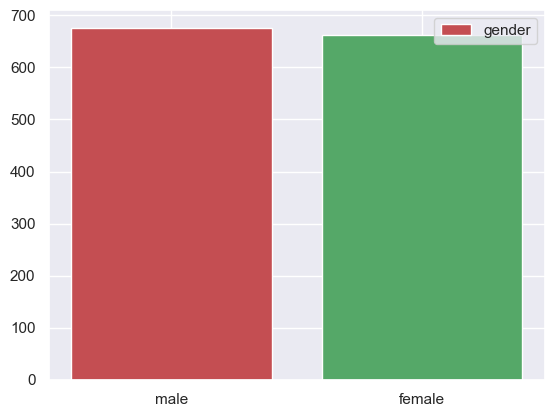

In [14]:
no_of_male = len(insured[insured['sex'] == 'male'])
no_of_female = len(insured[insured['sex'] == 'female'])

plt.bar(['male','female'],[no_of_male,no_of_female],color = ['r','g'],label = 'gender')
plt.legend()
plt.show()

In [15]:
list_col = insured.select_dtypes(['category']).columns
for i in range(len(list_col)):
    print(list(insured[list_col[i]].value_counts().index), list(insured[list_col[i]].value_counts()))

['male', 'female'] [676, 662]
['no', 'yes'] [1064, 274]
['southeast', 'northwest', 'southwest', 'northeast'] [364, 325, 325, 324]


In [16]:
#alternate for above
for i in list_col:
    print(list(insured[i].value_counts().index), list(insured[i].value_counts()))

['male', 'female'] [676, 662]
['no', 'yes'] [1064, 274]
['southeast', 'northwest', 'southwest', 'northeast'] [364, 325, 325, 324]


In [17]:
data = {}
for i in list_col:
    value = list(insured[i].value_counts())
    sub_category = list(insured[i].value_counts().index)
    data[i] = [sub_category, value]
data

{'sex': [['male', 'female'], [676, 662]],
 'smoker': [['no', 'yes'], [1064, 274]],
 'region': [['southeast', 'northwest', 'southwest', 'northeast'],
  [364, 325, 325, 324]]}

# Bar graph


In [18]:
print(data['region'])

[['southeast', 'northwest', 'southwest', 'northeast'], [364, 325, 325, 324]]


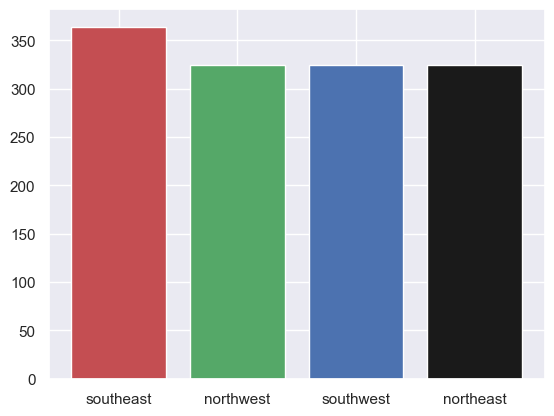

In [19]:
#region
# plt.bar(x,y)
plt.bar(data['region'][0],data['region'][1], label = ['southeast', 'northwest', 'southwest', 'northeast'], color=['r','g','b','k'])
# plt.legend()
plt.show()

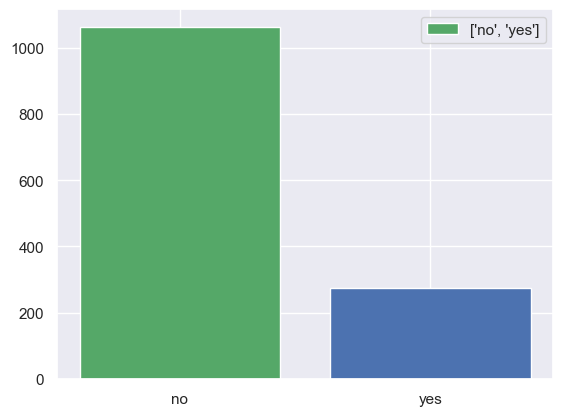

In [20]:
#smoker
plt.bar(data['smoker'][0],data['smoker'][1], 
        color = ['g','b'], 
        label=['no','yes'])
plt.legend()
plt.show()

In [21]:
insured.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


# sea born

# heatmap


<AxesSubplot:>

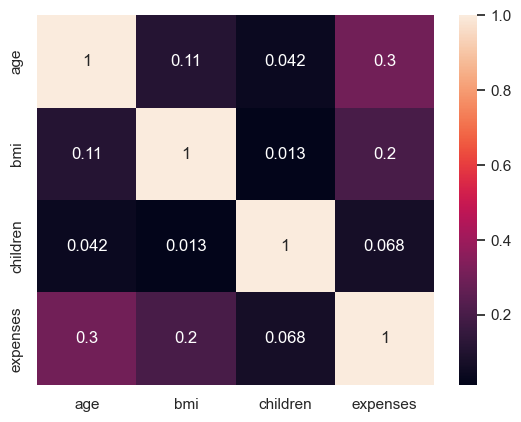

In [22]:
sns.heatmap(insured.corr(),annot = True)

# pair plot

<Figure size 500x500 with 0 Axes>

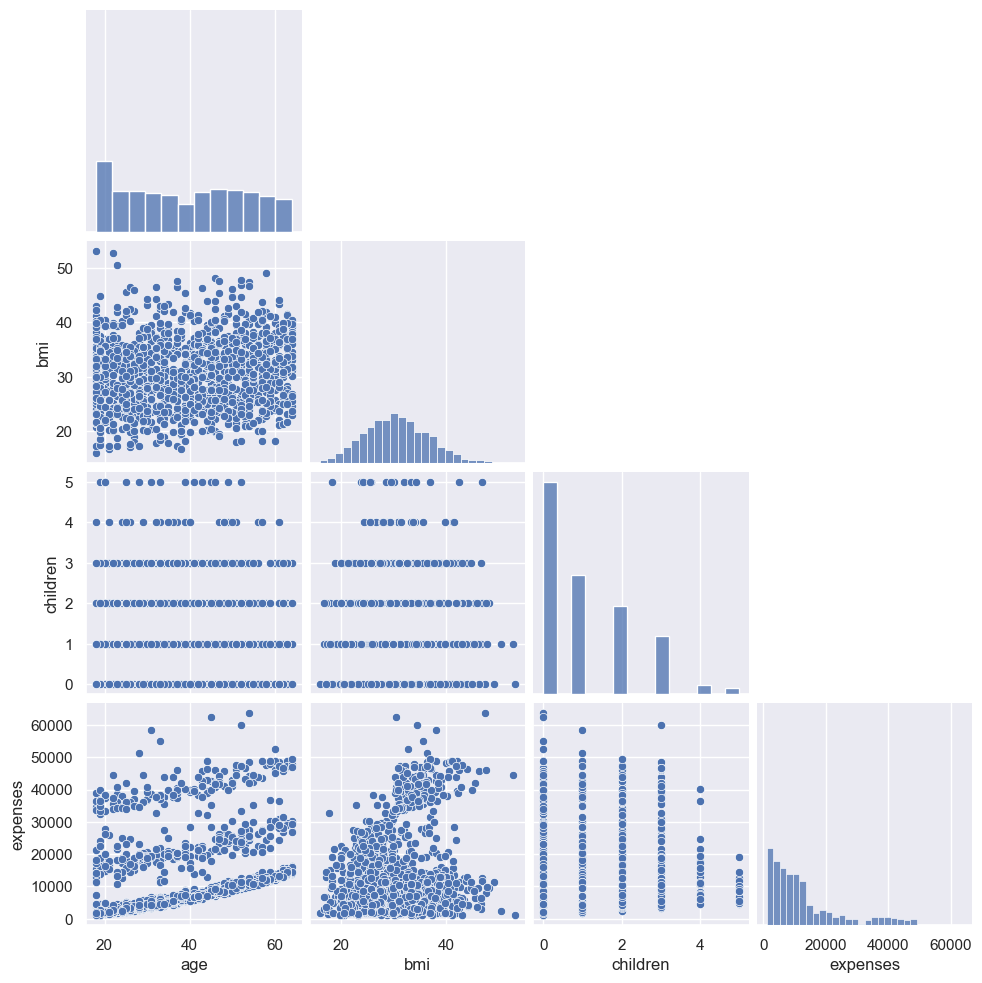

In [23]:
plt.figure(figsize=(5,5))
sns.pairplot(data=insured , corner=True)
plt.show()

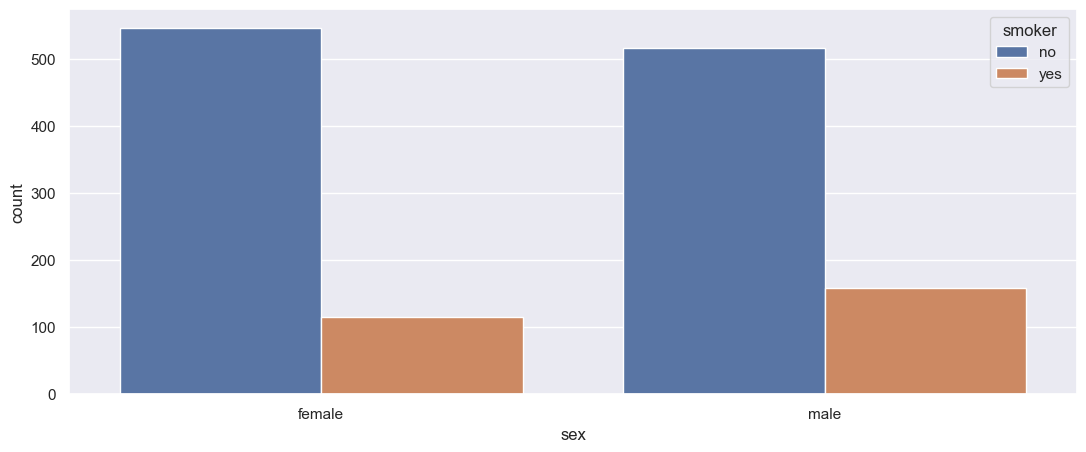

In [24]:
#Sex vs smoker
#sabai data categorucal vaye matra hue use garne
plt.figure(figsize=(13,5))
ax=sns.countplot(x='sex',hue='smoker',data=insured)
# bar_perc(ax,insured['smoker'])  bar_perc to show percentage but not working in this env


[Text(0.5, 1.0, 'smoker vs nonsomoker expenses')]

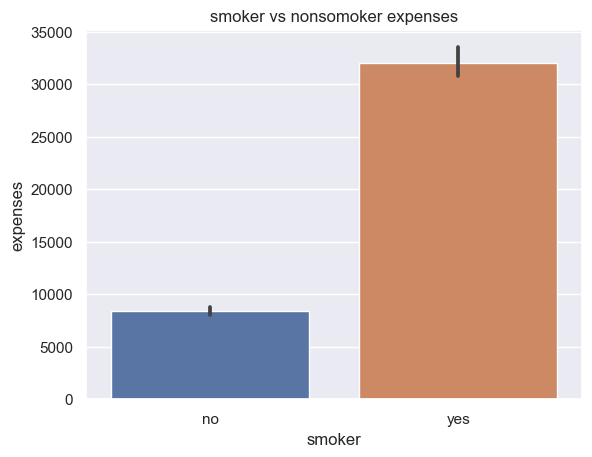

In [25]:
sns.barplot(x = insured.smoker, y = insured.expenses).set(title = "smoker vs nonsomoker expenses")

<AxesSubplot:xlabel='smoker', ylabel='age'>

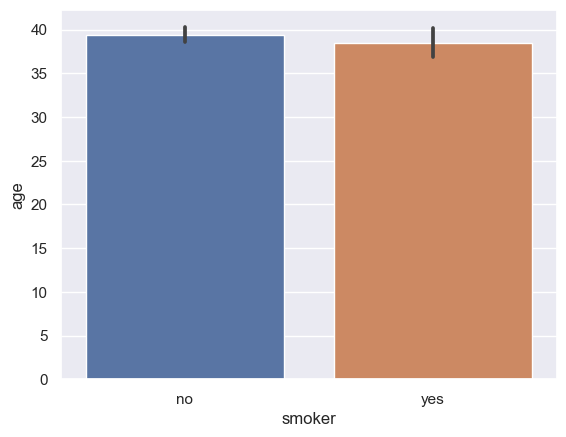

In [26]:
sns.barplot(x=insured.smoker , y=insured.age)

[Text(0.5, 1.0, 'Smoker vs Region')]

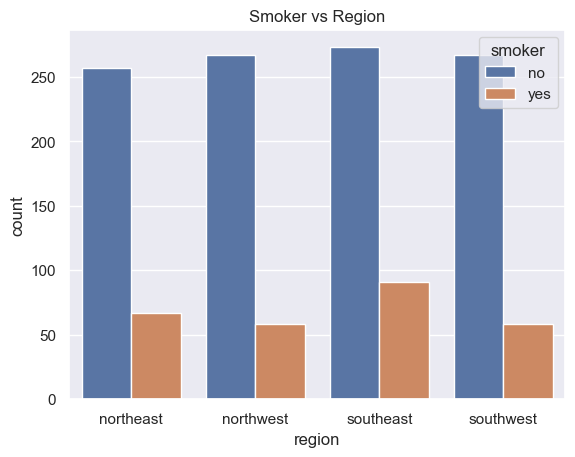

In [27]:
ax =sns.countplot(x='region',hue='smoker',data=insured)
ax.set(title="Smoker vs Region")


In [28]:
#Group by
insured.groupby(insured.sex).expenses.mean()

sex
female    12569.578897
male      13956.751420
Name: expenses, dtype: float64

In [29]:
insured.groupby(insured.region).expenses.sum()  #sabai ko expenses lai jodxa

region
northeast    4343668.64
northwest    4035711.93
southeast    5363689.80
southwest    4012754.82
Name: expenses, dtype: float64

In [30]:
insured.groupby(insured.children).expenses.mean()

children
0    12365.975767
1    12731.171821
2    15073.564000
3    15355.318535
4    13850.656800
5     8786.035556
Name: expenses, dtype: float64

[Text(0.5, 1.0, 'Smoker vs expense')]

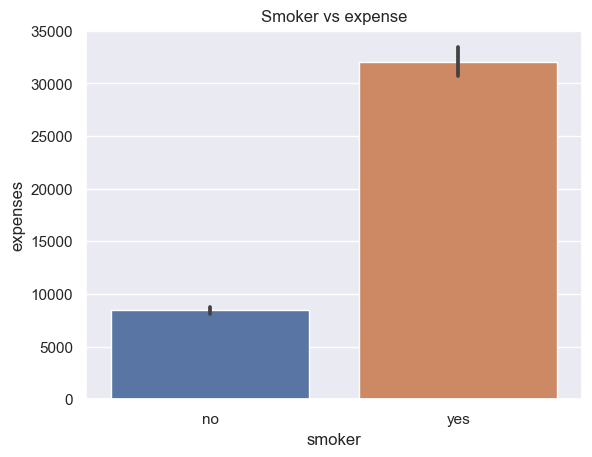

In [31]:
sns.barplot(x = insured.smoker,y=insured.expenses).set(title='Smoker vs expense')

In [32]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   expenses  1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


<AxesSubplot:xlabel='sex', ylabel='expenses'>

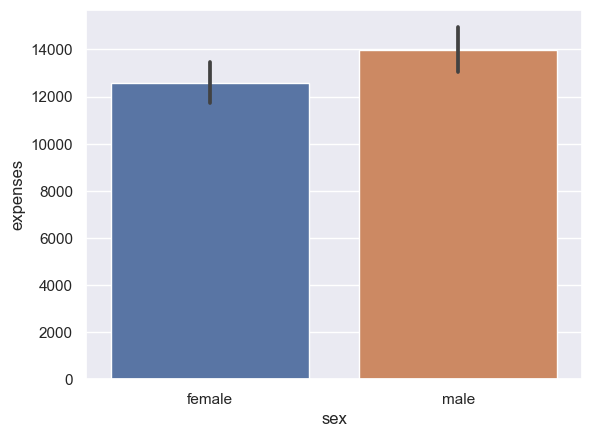

In [33]:
sns.barplot(x='sex',y='expenses',data=insured)

# multi varient


<AxesSubplot:xlabel='age', ylabel='expenses'>

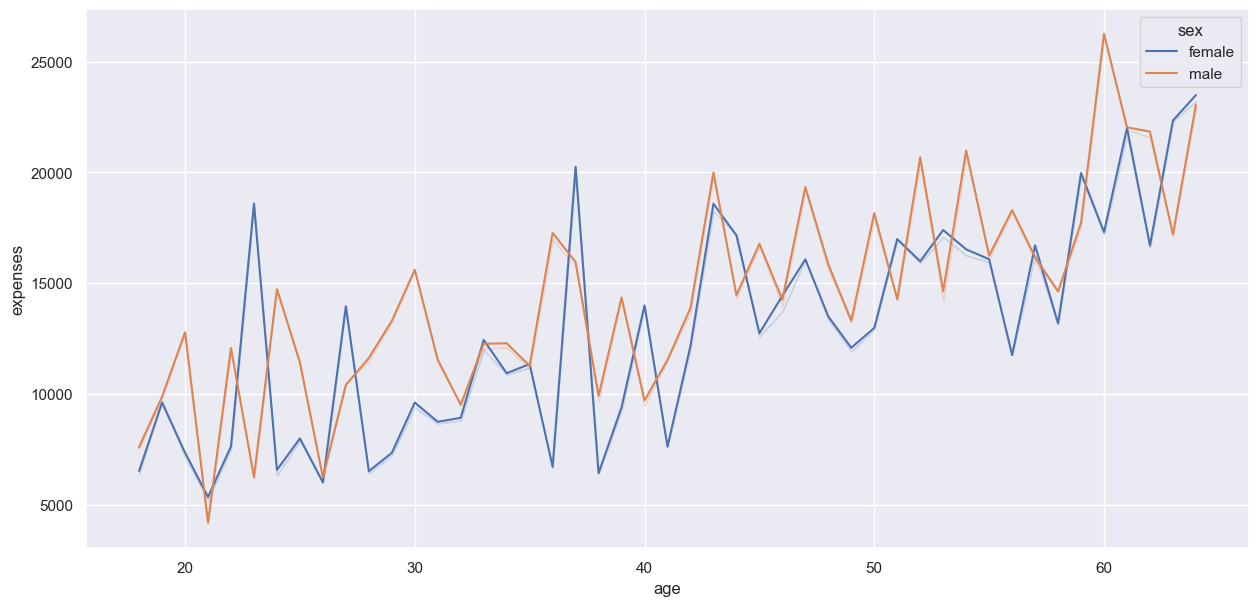

In [34]:
plt.figure(figsize=(15,7))
sns.lineplot(x = insured['age'], y = insured['expenses'], hue = insured['sex'], ci =0)
# pltlegend(bbox_to_anchor = (0.5,1))
#ci=0 garena vane both lone plot and area plot dinxa

# cross tab

In [35]:
pd.crosstab(index = insured.smoker , columns = insured.sex, values = insured.expenses, aggfunc = 'mean')


sex,female,male
smoker,,
no,8762.297367,8087.204971
yes,30678.996261,33042.006226


In [46]:
df_smoker_char_sex = pd.crosstab(index = insured.sex, columns = insured.smoker, values= insured.expenses, aggfunc = 'mean')
df_smoker_char_sex

smoker,no,yes
sex,,
female,8762.297367,30678.996261
male,8087.204971,33042.006226


<AxesSubplot:title={'center':'smoker vs expenses for male and female'}, xlabel='sex'>

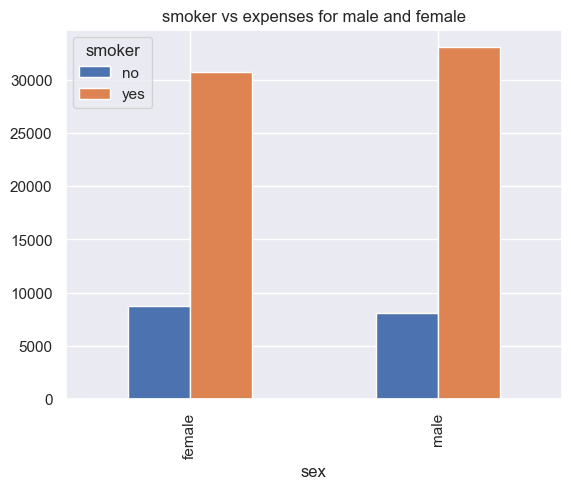

In [48]:
df_smoker_char_sex.plot(kind ='bar', title='smoker vs expenses for male and female')

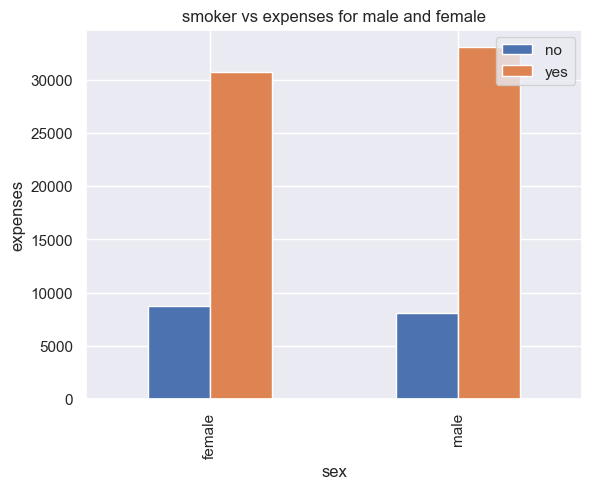

In [53]:
df_smoker_char_sex.plot(kind ='bar', title='smoker vs expenses for male and female').set(ylabel = 'expenses', xlabel = 'sex')
plt.legend(loc ='upper right')

In [75]:
df_region_sex_expenses = pd.crosstab(index = insured.sex , columns = insured.region, values = insured.expenses,aggfunc='mean
df_region_sex_expenses

region,northeast,northwest,southeast,southwest
sex,,,,
female,12953.203106,12479.870244,13499.669257,11274.411667
male,13854.005767,12354.119317,15879.617354,13412.884233


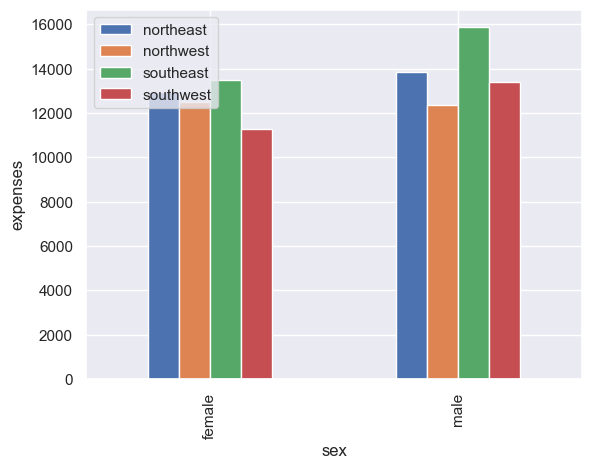

In [63]:
df_region_sex_expenses.plot(kind ='bar').set(ylabel = 'expenses')
plt.legend(loc = 'upper left')

In [89]:
df_age = pd.crosstab(index= insured['age'][0:30], columns = insured.sex, values = insured.expenses, aggfunc= 'mean' )
df_age

sex,female,male
age,,
18,NaN,1431.280
19,16884.920,1837.240
23,NaN,2332.400
25,NaN,2721.320
27,NaN,39611.760
28,NaN,4449.460
30,4149.740,36837.470
31,3756.620,38711.000
32,NaN,3866.860


<AxesSubplot:xlabel='age'>

<Figure size 30000x15000 with 0 Axes>

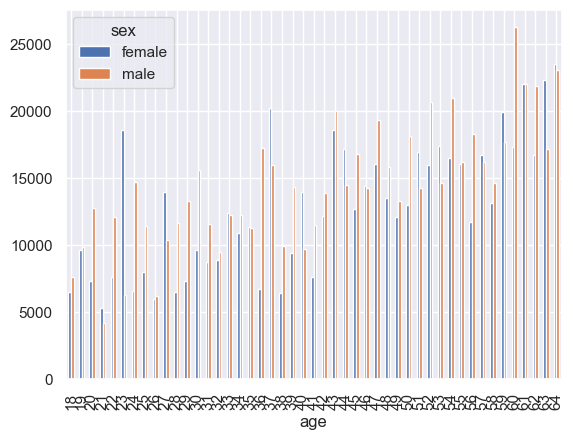

In [86]:
plt.figure(figsize =(300,150) )
df_age.plot(kind = 'bar')


In [94]:
#creating group of bmi
category = pd.cut(insured.bmi, bins = [15,25,35,45,55], labels = ['15-25','25-35','35-45','45-55'])
category
insured.insert(5,'BMIGroup',category)


ValueError: cannot insert BMIGroup, already exists

In [98]:
insured.head()


,age,sex,bmi,children,smoker,BMIGroup,region,expenses
0,19,female,27.9,0,yes,25-35,southwest,16884.92
1,18,male,33.8,1,no,25-35,southeast,1725.55
2,28,male,33.0,3,no,25-35,southeast,4449.46
3,33,male,22.7,0,no,15-25,northwest,21984.47
4,32,male,28.9,0,no,25-35,northwest,3866.86


In [103]:
insured.groupby(insured.BMIGroup).expenses.mean()

BMIGroup
15-25    10284.290121
25-35    12720.254413
35-45    16913.681791
45-55    17547.927500
Name: expenses, dtype: float64

In [106]:
age_cat = pd.cut(insured.age, bins=[17,27,37,47,57,67], labels = ['17-27','27-37','37-47','47-57','57-67'])
age_cat

0       17-27
1       17-27
2       27-37
3       27-37
4       27-37
        ...  
1333    47-57
1334    17-27
1335    17-27
1336    17-27
1337    57-67
Name: age, Length: 1338, dtype: category
Categories (5, object): ['17-27' < '27-37' < '37-47' < '47-57' < '57-67']

In [107]:
insured.insert(6,'Agebin',age_cat)

In [109]:
insured.head()

,age,sex,bmi,children,smoker,BMIGroup,Agebin,region,expenses
0,19,female,27.9,0,yes,25-35,17-27,southwest,16884.92
1,18,male,33.8,1,no,25-35,17-27,southeast,1725.55
2,28,male,33.0,3,no,25-35,27-37,southeast,4449.46
3,33,male,22.7,0,no,15-25,27-37,northwest,21984.47
4,32,male,28.9,0,no,25-35,27-37,northwest,3866.86


In [124]:
expenses_vs_age=insured.groupby(insured.Agebin).expenses.mean()
expenses_vs_age

Agebin
17-27     9098.192403
27-37    11661.811832
37-47    13730.042500
47-57    15937.657662
57-67    19766.124695
Name: expenses, dtype: float64

[Text(0, 0.5, 'expenses')]

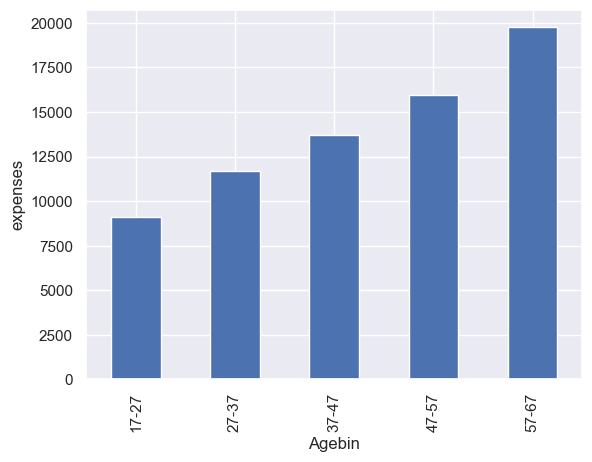

In [117]:
expenses_vs_age.plot(kind='bar').set(ylabel = 'expenses')

In [121]:
chi= pd.crosstab(insured.sex,insured.children)
chi

children,0,1,2,3,4,5
sex,,,,,,
female,289,158,119,77,11,8
male,285,166,121,80,14,10


<AxesSubplot:xlabel='sex'>

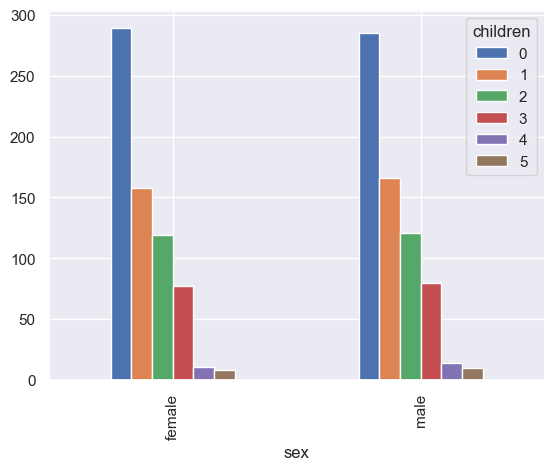

In [125]:
chi.plot(kind = "bar")

# Replot 

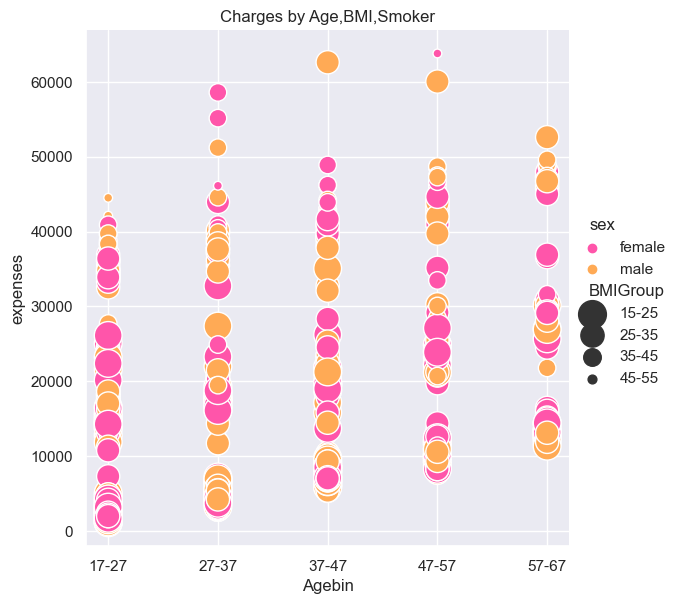

In [128]:
sns.relplot(x=insured.Agebin, y=insured.expenses, hue=insured.sex, size= insured.BMIGroup,
            sizes=(40, 400), palette="spring",
            height=6, data=insured).set(title='Charges by Age,BMI,Smoker');